In [1]:
#Find RT entropy for unperturbed BTZ in global coords

In [2]:
import sympy as smp
import matplotlib.pyplot as plt
smp.init_printing(use_latex='mathjax')
from xnp import *
backend = 'cupy' if getattr(np, '__name__', '') == 'cupy' else 'numpy'

Using NumPy and SciPy on CPU


In [ ]:
#let's try sympy?
rp = smp.Symbol("r'",real=True)
r = smp.Symbol("r",real=True,positive=True)
r0 = smp.Symbol("r_0",real=True,positive=True)
R = smp.Symbol("R",real=True,positive=True)
l = smp.Symbol(r"\mathcal{l}",real=True)
t = smp.Symbol('t',real=True)
f_expr = l**2 / (r**2 - R**2)
f = smp.Lambda(r,f_expr)

In [4]:
f(r0)

           2
\mathcal{l} 
────────────
    2     2 
 - R  + r₀  

In [ ]:
#lets solve that ugly quartic we get from lagrange
rpSolns = smp.solvers.solve(rp**4*(1-f(r))**2*f(r)*f(r0) + 2*f(r0)*(1-f(r))*rp**2 + f(r0)/f(r) + f(r)**2*rp**2 - 1,rp)
rpSolns

⎡        _____________________________________________________________________ ↪
⎢       ╱                                                                      ↪
⎢      ╱                                                             6         ↪
⎢     ╱                                                           2⋅R          ↪
⎢-   ╱    ──────────────────────────────────────────────────────────────────── ↪
⎢   ╱        4            2      2            4      2            2  2         ↪
⎣ ╲╱      2⋅R ⋅\mathcal{l}  + 4⋅R ⋅\mathcal{l}  - 4⋅R ⋅\mathcal{l} ⋅r  + 2⋅\ma ↪

↪ ____________________________________________________________________________ ↪
↪                                                                              ↪
↪                                                                              ↪
↪                                                                              ↪
↪ ───────────────────────────────────────────────── + ──────────────────────── ↪
↪         6                

In [6]:
#now its time to check validity, want only the solutions with negative r' as we fall into the black hole

In [ ]:
#the other two solns are just these guys but positive, so this check is enough
Nsoln1 = smp.lambdify((r,r0,R,l),rpSolns[0],modules=[backend])
Nsoln2 = smp.lambdify((r,r0,R,l),rpSolns[2],modules=[backend])

In [28]:
Nsoln1(np.array([0.000001,0.99,1,2,3,4,4.99999]),100,1,1)

array([ -1.00005002,  -0.0199    ,  -0.        ,  -2.99596139,
        -7.80943527, -13.28630775, -17.81676864])

In [29]:
Nsoln2(np.array([0.000001,0.99,1,2,3,4,4.99999]),100,1,1)

<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in sqrt
  return -sqrt(Dummy_36**2*R**4/(2*Dummy_36**6 + 4*Dummy_36**4*R**2 - 4*Dummy_36**4*r**2 + 2*Dummy_36**2*R**4 - 4*Dummy_36**2*R**2*r**2 + 2*Dummy_36**2*r**4) - 3*Dummy_36**2*R**2*r**2/(2*Dummy_36**6 + 4*Dummy_36**4*R**2 - 4*Dummy_36**4*r**2 + 2*Dummy_36**2*R**4 - 4*Dummy_36**2*R**2*r**2 + 2*Dummy_36**2*r**4) + Dummy_36**2*R**2*r_0**2/(2*Dummy_36**6 + 4*Dummy_36**4*R**2 - 4*Dummy_36**4*r**2 + 2*Dummy_36**2*R**4 - 4*Dummy_36**2*R**2*r**2 + 2*Dummy_36**2*r**4) + 2*Dummy_36**2*r**4/(2*Dummy_36**6 + 4*Dummy_36**4*R**2 - 4*Dummy_36**4*r**2 + 2*Dummy_36**2*R**4 - 4*Dummy_36**2*R**2*r**2 + 2*Dummy_36**2*r**4) - Dummy_36**2*r**2*r_0**2/(2*Dummy_36**6 + 4*Dummy_36**4*R**2 - 4*Dummy_36**4*r**2 + 2*Dummy_36**2*R**4 - 4*Dummy_36**2*R**2*r**2 + 2*Dummy_36**2*r**4) + 2*R**6/(2*Dummy_36**6 + 4*Dummy_36**4*R**2 - 4*Dummy_36**4*r**2 + 2*Dummy_36**2*R**4 - 4*Dummy_36**2*R**2*r**2 + 2*Dummy_36**2*r**4) - 6*R**4*r**2/(2*Dummy_36**6 

array([-49.99749894, -13.83081151,  -0.        ,          nan,
                nan,          nan,          nan])

In [ ]:
#soln1 is valid for all space, while soln2 is only valid in the event horizon
#so let's try three different cases: integrate action from EH to r0, integrate from 0 to r0 using only soln1, and then the same using a piecewise r'
#we'll try these symbolically and then numerically with variable R

In [ ]:
#did not end up testing all of these cases, we numerically do soln1 from EH to r0

In [11]:
rp1 = rpSolns[0]
rp1

        ______________________________________________________________________ ↪
       ╱                                                                       ↪
      ╱                                                             6          ↪
     ╱                                                           2⋅R           ↪
-   ╱    ───────────────────────────────────────────────────────────────────── ↪
   ╱        4            2      2            4      2            2  2          ↪
 ╲╱      2⋅R ⋅\mathcal{l}  + 4⋅R ⋅\mathcal{l}  - 4⋅R ⋅\mathcal{l} ⋅r  + 2⋅\mat ↪

↪ ____________________________________________________________________________ ↪
↪                                                                              ↪
↪                                                                              ↪
↪                                                                              ↪
↪ ──────────────────────────────────────────────── + ───────────────────────── ↪
↪        6                4

In [12]:
integrandExpr1 = smp.sqrt(f(r)*rp1**2 + 1/f(r))/rp1
integrand1 = smp.Lambda(r,integrandExpr1)

In [13]:
integrandExpr1

           ___________________________________________________________________ ↪
          ╱              ⎛                                                     ↪
         ╱               ⎜                                                     ↪
        ╱              2 ⎜                                                     ↪
       ╱    \mathcal{l} ⋅⎜──────────────────────────────────────────────────── ↪
      ╱                  ⎜   4            2      2            4      2         ↪
     ╱                   ⎝2⋅R ⋅\mathcal{l}  + 4⋅R ⋅\mathcal{l}  - 4⋅R ⋅\mathca ↪
-   ╱       ────────────────────────────────────────────────────────────────── ↪
   ╱                                                                           ↪
 ╲╱                                                                            ↪
────────────────────────────────────────────────────────────────────────────── ↪
                        ______________________________________________________ ↪
                       ╱    

In [ ]:
#smp.integrate(integrand1(r),(r,R,r0))

In [15]:
#welp i guess i expected that it wouldnt go well symbolically, time to numerically integrate this guy
#lets iterate over R and set l=1 r0=1000000

In [16]:
Nintegrand1 = smp.lambdify((r,r0,R,l),integrandExpr1,modules=[backend])

In [18]:
#integrate from R to boundary 
def action1(r0,l,N,rMin=0.1):
    RGrid_full = np.logspace(np.log10(rMin), np.log10(r0-1), N)
    valid_mask = 1.5 * RGrid_full < r0
    RGrid = RGrid_full[valid_mask]
    t = np.linspace(0,1,len(RGrid))
    rGrid = t[:-1,None] * (r0 - 1.5*RGrid[None,:]) + 1.5*RGrid[None,:]
    vals = Nintegrand1(rGrid[:,:-1], r0, RGrid[None, :-1], l)
    action = np.trapz(vals,rGrid[:,:-1],axis=0)
    return np.array(RGrid), np.array(action)

In [ ]:
#above was so busted for a while, had copilot help me debug
#turns out there's a bunch of numerical instability around the horizon...
def debug_integrand(r0, l, N=10, rMin=0.1):
    RGrid_full = np.logspace(np.log10(rMin), np.log10(r0-1), N)
    valid_mask = 1.5 * RGrid_full < r0
    RGrid = RGrid_full[valid_mask]
    
    # Use the actual number of valid R values, not the original N
    t = np.linspace(0, 1, len(RGrid))  # This is the key fix!
    rGrid = t[:-1,None] * (r0 - 1.5*RGrid[None,:]) + 1.5*RGrid[None,:]
    
    print(f"Original N: {N}, Valid R count: {len(RGrid)}")
    print(f"RGrid range: {RGrid.min():.6f} to {RGrid.max():.6f}")
    print(f"rGrid range: {rGrid.min():.6f} to {rGrid.max():.6f}")
    print(f"rGrid shape: {rGrid.shape}")
    
    # Check first few columns
    for j in range(min(3, len(RGrid))):
        print(f"Column {j}: R={RGrid[j]:.6f}, r starts at {rGrid[0,j]:.6f}")
    
    # Check the full array
    vals = Nintegrand1(rGrid[:,:-1], r0, RGrid[None, :-1], l)
    print(f"\nFull integrand:")
    print(f"vals is complex: {np.iscomplexobj(vals)}")
    print(f"vals has NaN: {np.isnan(vals).any()}")
    print(f"vals has inf: {np.isinf(vals).any()}")
    
    finite_mask = np.isfinite(vals)
    print(f"Finite values: {finite_mask.sum()}/{vals.size}")
    
    return RGrid, rGrid, vals

RGrid_debug,rGrid_debug,vals_debug = debug_integrand(1000000,0.1,500)

Original N: 500, Valid R count: 487
RGrid range: 0.100000 to 657105.114617
rGrid range: 0.150000 to 999970.489037
rGrid shape: (486, 487)
Column 0: R=0.100000, r starts at 0.150000
Column 1: R=0.103283, r starts at 0.154924
Column 2: R=0.106673, r starts at 0.160010

Full integrand:
vals is complex: False
vals has NaN: False
vals has inf: False
Finite values: 236196/236196


In [161]:
"""RGrid_debug
list(rGrid_debug)
list(vals_debug)"""
''

''

In [30]:
R,s = action1(100000,0.1,5000)

/var/folders/sf/wr1kbwcd5dj1bbcsxb86lz7w0000gn/T/ipykernel_56522/2228227330.py:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  action = np.trapz(vals,rGrid[:,:-1],axis=0)


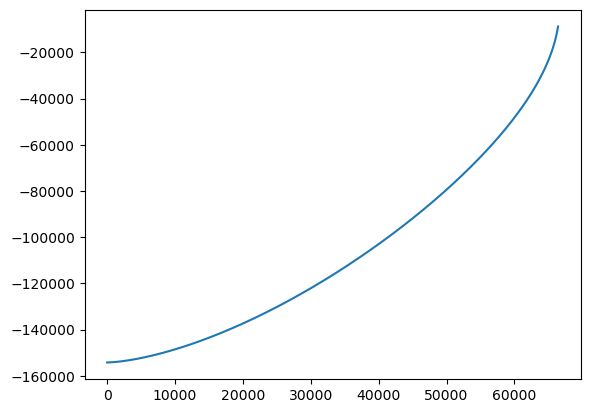

In [22]:
plt.plot(R[:-1],s)
#plt.semilogx()

In [167]:
#ok so this shit should not be negative, which means we need to pick different solns of the quartic?

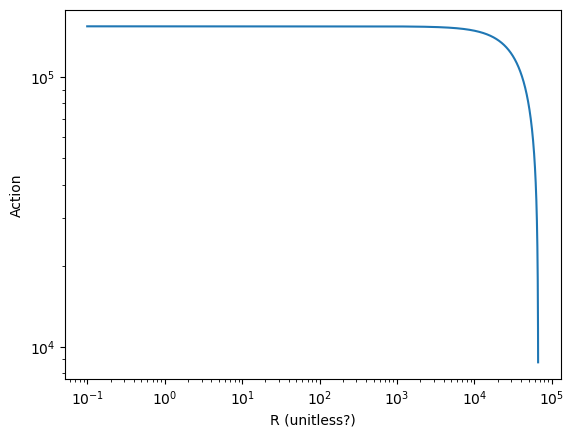

In [ ]:
#this is now the second solution
plt.plot(R[:-1],-s)
plt.xlabel('R (unitless?)')
plt.ylabel('Action')
plt.semilogx()
plt.semilogy()
plt.show()
plt.close()

In [ ]:
#Im getting the sense that i need to probe closer to the horizon, but numerical instability is a bitch...
#at least my values are all real and finite i gues???
#behavior also kinda mirrors what we expect from other cases - more temperature means less entanglement